#1. Create a data-frame with three columns (1) Goal (2) num_donors and (3) funding_status

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Crowdfunding_data_1000_projects (3).xlsx")

In [ ]:
df1 = df.loc[:,["Goal","num_donors","funding_status"]]

In [ ]:
df1.head()

,Goal,num_donors,funding_status
0,887.15,7,completed
1,761.52,3,NotCompleted
2,266.55,6,completed
3,808.15,1,NotCompleted
4,1296.65,1,NotCompleted


Convert values in column funding_status from text to integers (completed=1; NotCompleted=0)

In [ ]:
df1["funding_status"]=np.where(df1.funding_status=="completed",1,0)
df1.head()

,Goal,num_donors,funding_status
0,887.15,7,1
1,761.52,3,0
2,266.55,6,1
3,808.15,1,0
4,1296.65,1,0


In [ ]:
x = df1.iloc[:,[0,1]]
y = df1.iloc[:,2]

Perform 70:30 (i.e., 70% training data and remaining test data) split and create two data-frames: (1) train and (2) test. The rows must be selected randomly (2 points)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

#2. Use train data-frame to train a decision tree model (2 points).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model =  DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#3. Plot the tree (2 points).





In [ ]:
from sklearn import tree

In [ ]:
decisions = tree.export_text(model)
print(decisions)

|--- feature_1 <= 0.50
|   |--- class: 0
|--- feature_1 >  0.50
|   |--- feature_1 <= 3.50
|   |   |--- feature_0 <= 243.96
|   |   |   |--- feature_0 <= 204.20
|   |   |   |   |--- feature_0 <= 156.93
|   |   |   |   |   |--- feature_0 <= 156.36
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  156.36
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  156.93
|   |   |   |   |   |--- feature_0 <= 188.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  188.02
|   |   |   |   |   |   |--- feature_0 <= 188.14
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  188.14
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  204.20
|   |   |   |   |--- feature_0 <= 206.04
|   |   |   |   |   |--- feature_1 <= 2.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  2.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  206.04


In [ ]:
#fig = plt.figure(figsize=(25,20))
#a= tree.plot_tree(model)

In [ ]:
import graphviz
re = tree.export_graphviz(model)

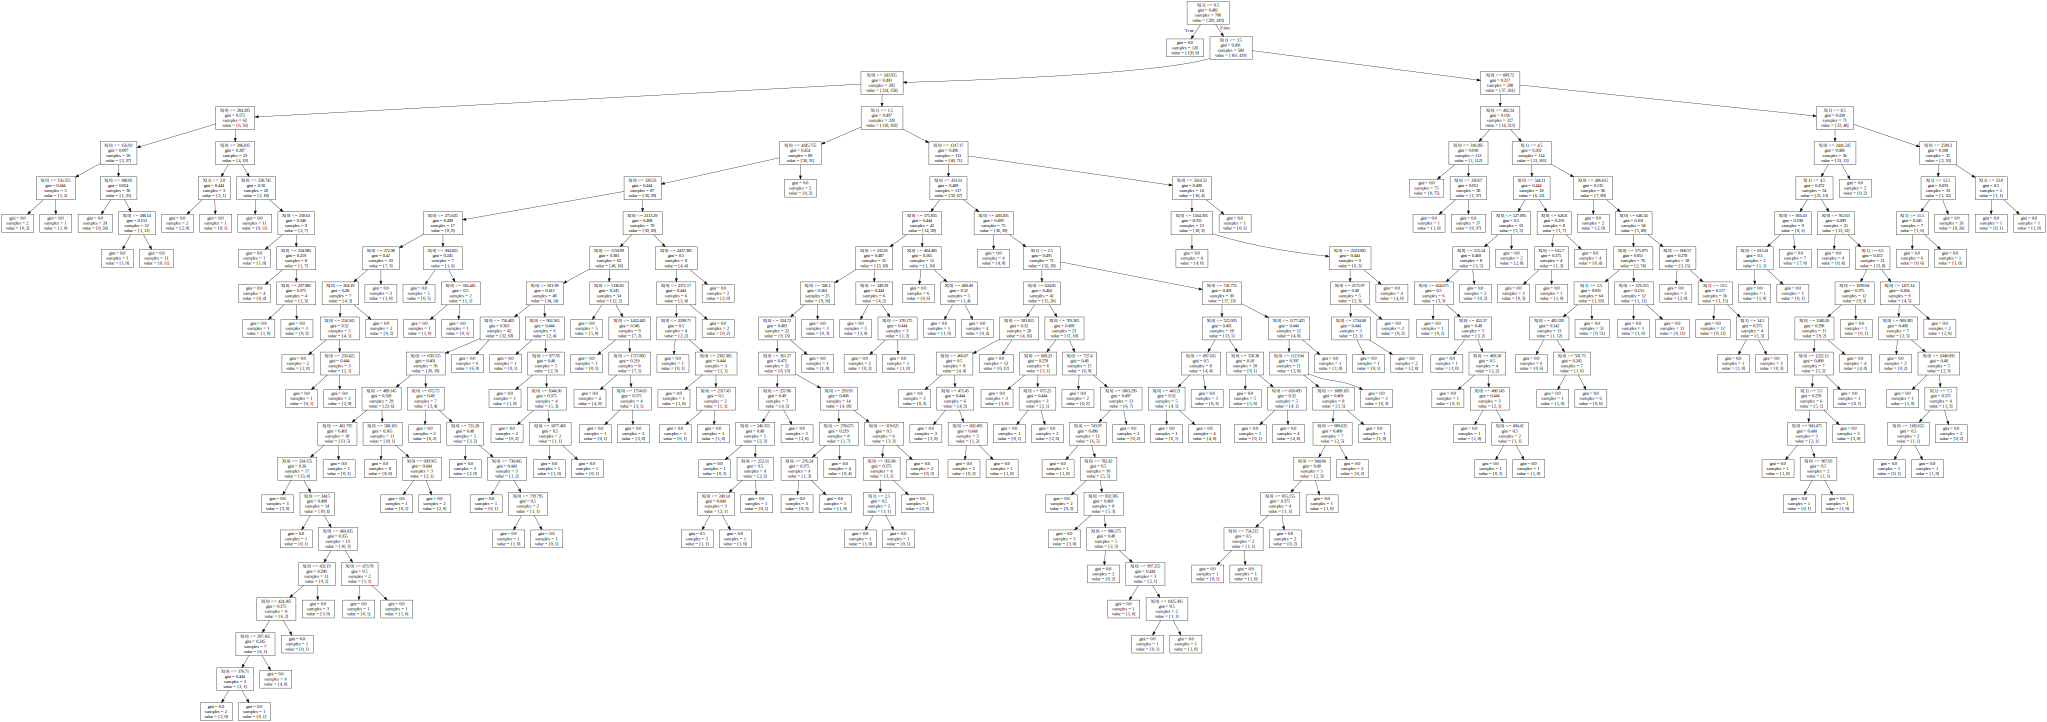

In [ ]:
graph = graphviz.Source(re, format="png") 
graph

#4. Use test data-frame to show confusion matrix and model accuracy (2 points).

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 81,  45],
       [ 31, 143]])

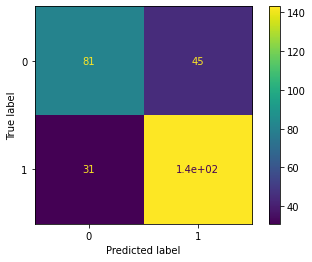

In [ ]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

In [ ]:
model.score(x_test,y_test)# model accuracy on test data

0.7466666666666667

#5. Perform steps 1-4 with two columns: (1) Goal and (2) funding_status, and document the change in accuracy as a comment (2 points).

In [ ]:
df2 = df1.iloc[:,[0,2]]
df2.head()

,Goal,funding_status
0,887.15,1
1,761.52,0
2,266.55,1
3,808.15,0
4,1296.65,0


In [ ]:
x = df2.iloc[:,[0]]
y = df2.iloc[:,[1]]

In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x,y,test_size=0.3)

In [ ]:
model_1 =  DecisionTreeClassifier()

In [ ]:
model_1.fit(x_train_1, y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
decisions_1 = tree.export_text(model_1)
print(decisions_1)

|--- feature_0 <= 611.35
|   |--- feature_0 <= 299.12
|   |   |--- feature_0 <= 185.70
|   |   |   |--- feature_0 <= 156.91
|   |   |   |   |--- feature_0 <= 156.36
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  156.36
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  156.91
|   |   |   |   |--- feature_0 <= 177.64
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  177.64
|   |   |   |   |   |--- feature_0 <= 178.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  178.25
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  185.70
|   |   |   |--- feature_0 <= 186.25
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  186.25
|   |   |   |   |--- feature_0 <= 265.91
|   |   |   |   |   |--- feature_0 <= 243.96
|   |   |   |   |   |   |--- feature_0 <= 213.50
|   |   |   |   |   |   |   |--- feature_0 <= 210.58
|   |   |   |   |   |   |   |   |--- feature_0 <= 206.04
|   |   |   |   |   |   |

In [ ]:
import graphviz
re = tree.export_graphviz(model_1)

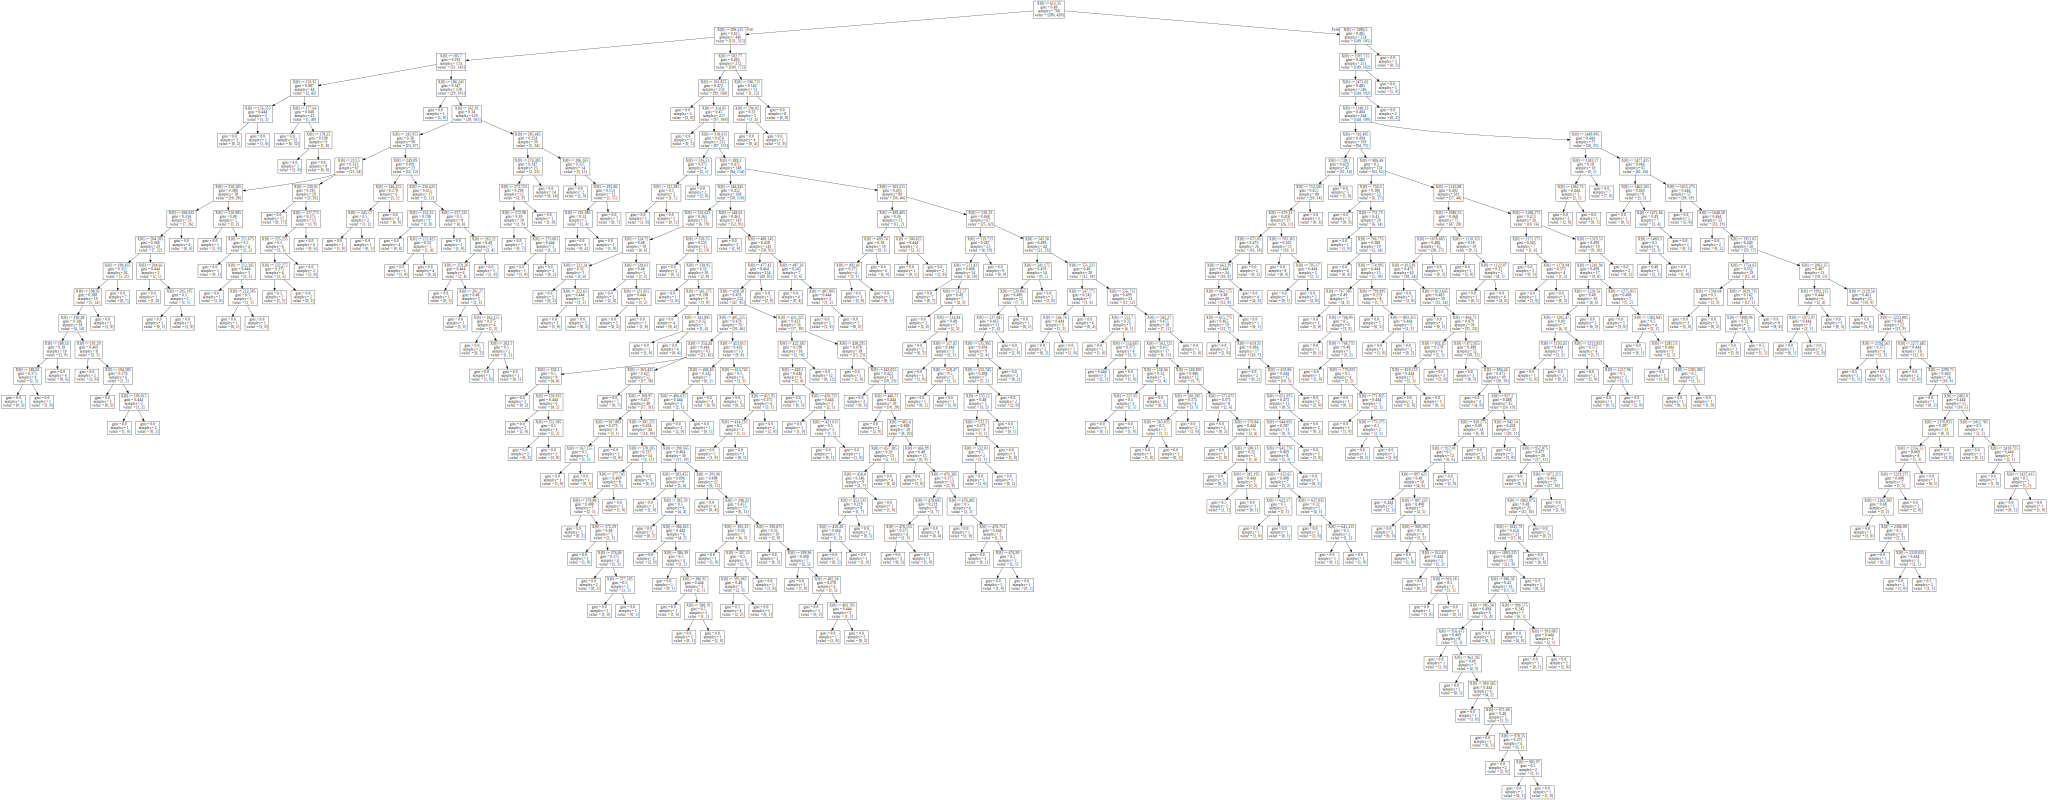

In [ ]:
graph = graphviz.Source(re, format="png") 
graph

In [ ]:
confusion_matrix(y_test_1,model_1.predict(x_test_1))

array([[ 61,  66],
       [ 57, 116]])

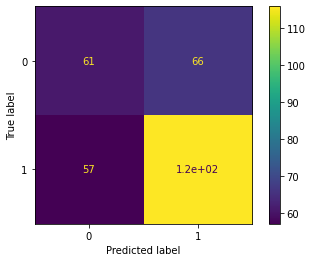

In [ ]:
plot_confusion_matrix(model_1, x_test_1, y_test_1)
plt.show()

In [ ]:
model_1.score(x_test_1,y_test_1)# model accuracy on test data

0.59

In [ ]:
#  In the first case we were predicting the funding status on the basis of Goals and Number of donors,
#  in this part the accuracy of the model on unseen data is 78.66%.
#  while in the second case the prediction is only based on the Goals column, when we removed a feature column and 
#  then repeat the same procedure the accuracy in that casse is 65%, that is we can say it got decreased by removing a feature column...